C:\Users\mrach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\mrach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlflow\store\artifact\utils\models.py:31: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  latest = client.get_latest_versions(name, None if stage is None else [stage])


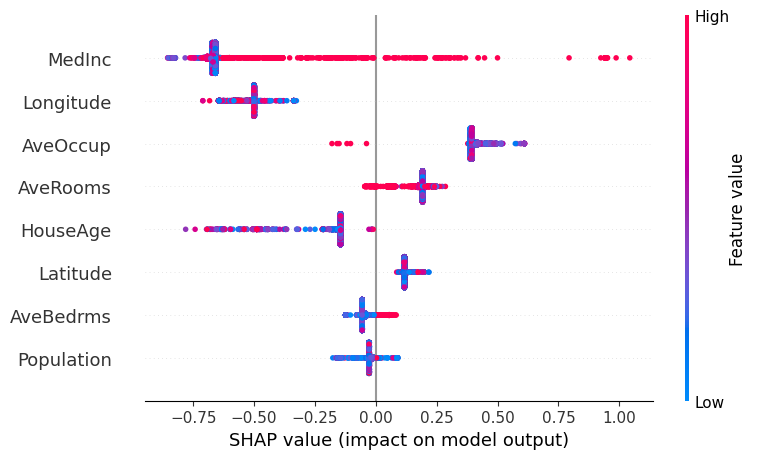

In [1]:
"""
import mlflow
import shap
import matplotlib.pyplot as plt
import pandas as pd

# Charger le meilleur modèle depuis le Model Registry de MLflow
model_uri = "models:/California_Housing_Best_Model_RandomForestRegressor/3"  # Remplacez par la version correcte du modèle
best_model = mlflow.sklearn.load_model(model_uri)

X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')

# 1. Calculer les importances globales des features avec Random Forest
importances = best_model.feature_importances_
indices = importances.argsort()

# Afficher un graphique des importances
plt.figure(figsize=(10, 6))
plt.title("Importance des Features")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])  # X_train doit être votre DataFrame d'entraînement
plt.xlabel("Importance")
plt.show()

# 2. Utiliser SHAP pour l'importance globale des features
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_train)

# Visualiser l'importance globale des features avec un résumé SHAP
shap.summary_plot(shap_values, X_train)

# 3. Analyser l'impact local pour un exemple spécifique
shap.initjs()  # Initialisation de SHAP pour les visualisations interactives
instance_idx = 0  # Exemple : la première instance dans le jeu de test
shap.force_plot(shap_values[instance_idx], X_train.iloc[instance_idx])
"""


import shap
import mlflow
import mlflow.sklearn
import pandas as pd

# Charger le modèle depuis MLflow Model Registry
mlflow.set_tracking_uri("http://localhost:5000")
model_name = "randomForest_BestModel" 
model = mlflow.sklearn.load_model(f"models:/{model_name}/latest")

# Charger les données d'entraînement pour calculer les SHAP values
data_path = "../data/Std data"
X_train = pd.read_csv(f"{data_path}/X_train.csv")

# Initialiser le SHAP Explainer pour un modèle RandomForest
explainer = shap.TreeExplainer(model)

# Calculer les valeurs SHAP pour l'ensemble de données d'entraînement
shap_values = explainer.shap_values(X_train)

# Résumé des valeurs SHAP pour l'ensemble des features
shap.summary_plot(shap_values, X_train)

In [9]:
shap.initjs()  # Initialisation de la visualisation interactive
shap.force_plot(explainer.expected_value[0], shap_values[0], X_train.iloc[0])

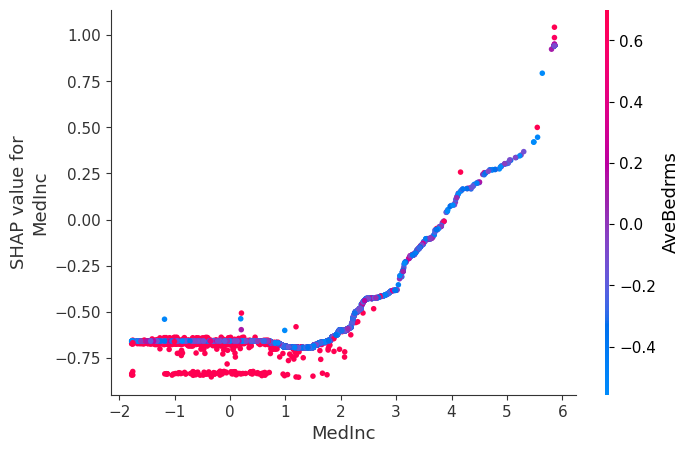

In [11]:
# Visualisation de la dépendance de la feature 'MedInc' avec les valeurs SHAP
shap.dependence_plot("MedInc", shap_values, X_train)